- By [lazarusA](https://lazarusa.github.io/Webpage/index.html)

In [1]:
χ0(xs, Ωs) = (Ωs/π)^(1/4) .* exp.(- Ωs*xs.^2.0./2)
χ1(xs, Ωs) = (4Ωs^3/π)^(1/4) .* xs .* exp.(- Ωs*xs.^2.0./2)
function χn(x; m = 2, t0 = 3, ω₀ = 0.57, Eα0 = -0.9)
    nr = m - 1
    T0 = 41.34*t0
    Ωs = T0^2/(4*log(2))
    x₀ = Eα0 .+ 2ω₀
    xs = (x .- x₀)
    a, b = χ1(xs, Ωs), χ0(xs, Ωs)
    if m<0
        return println("m must be greater than zero")
    elseif m==0
        return b
    elseif  m==1
        return a
    else
        for n in 1:nr
            a, b = √(2Ωs/(n+1)) .* xs .* a .-  √(n/(n+1)) .* b, a
        end
    end
    return a
end

χn (generic function with 1 method)

In [2]:
using CairoMakie, ColorSchemes, Colors
include("makieTheme2.jl") # don't forget to include the theme. 

In [37]:
cmap = reverse(get(colorschemes[:Spectral_10], LinRange(0,1,25))) # deep

In [38]:
x = LinRange(0,1,1500);

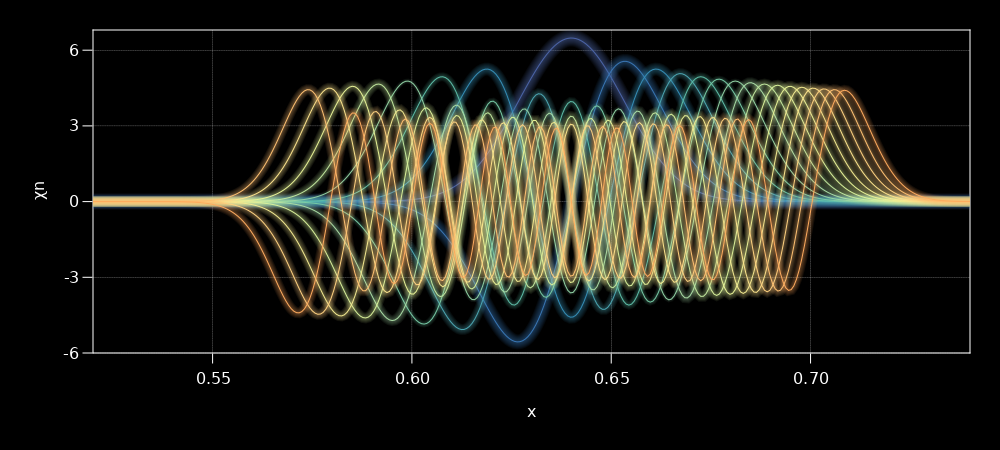

In [40]:
fig = Figure(resolution = (1000, 450), font = :sans)
ax  = Axis(fig, xlabel = "x", ylabel ="χn")
for n in 0:15
    lines!(x, χn(x; m = n, ω₀ = 0.77), color = cmap[n+2])
    #glow effect
    if n<7
        [lines!(x, χn(x; m = n, ω₀ = 0.77), color = (cmap[n+2],0.08),linewidth = 0.8 + 2*i) for i in 1:8-n]
    else
        [lines!(x, χn(x; m = n, ω₀ = 0.77), color = (cmap[n+2],0.08),linewidth = 0.8 + 2*i) for i in 1:5]
    end
end
limits!(ax, 0.52,0.74, -6, 6.8)
fig[1,1]= ax
save("./results/FigGlow.png", fig, px_per_unit = 2)
fig

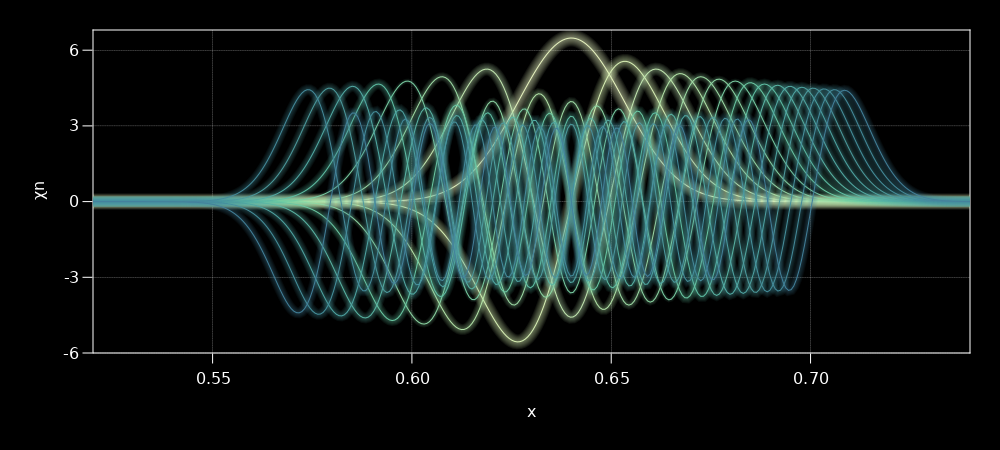

In [27]:
cmap = get(colorschemes[:deep], LinRange(0,1,30)) # deep
fig = Figure(resolution = (1000, 450), font = :sans)
ax  = Axis(fig, xlabel = "x", ylabel ="χn")
#lines!(x, χn(x; ω₀ = 0.77), color = cmap[1])
for n in 0:15
    lines!(x, χn(x; m = n, ω₀ = 0.77), color = cmap[n+2])
    #glow effect
    if n<7
        [lines!(x, χn(x; m = n, ω₀ = 0.77), color = (cmap[n+2],0.08),linewidth = 0.8 + 2*i) for i in 1:8-n]
    else
        [lines!(x, χn(x; m = n, ω₀ = 0.77), color = (cmap[n+2],0.08),linewidth = 0.8 + 2*i) for i in 1:5]
    end
end
limits!(ax, 0.52,0.74, -6, 6.8)
fig[1,1]= ax
fig

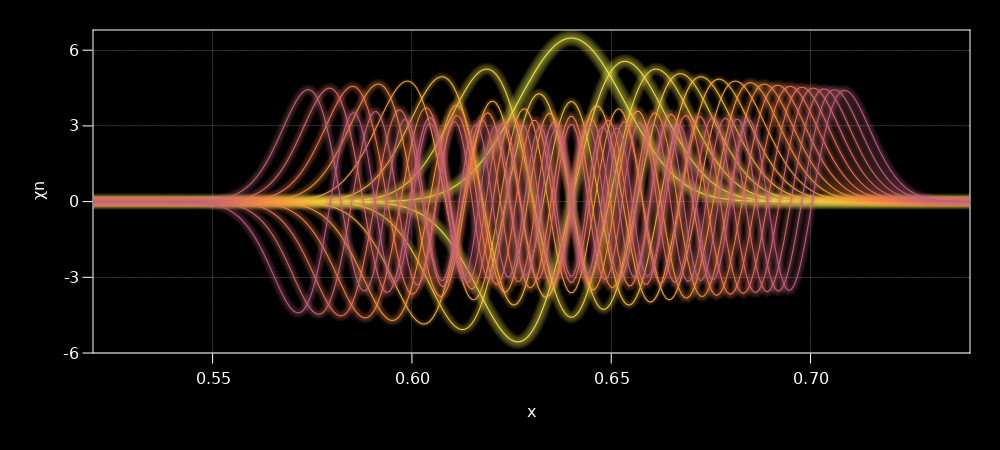

In [161]:
cmap = reverse(get(colorschemes[:thermal], LinRange(0,1,35))) # deep
x = LinRange(0,1,1500)
fig = Figure(resolution = (1000, 450), font = :sans)
ax  = Axis(fig, xlabel = "x", ylabel ="χn")
for n in 0:15
    lines!(x, χn(x; m = n, ω₀ = 0.77), color = cmap[n+2])
    #glow effect
    if n<7
        [lines!(x, χn(x; m = n, ω₀ = 0.77), color = (cmap[n+2],0.08),linewidth = 0.8 + 2*i) for i in 1:8-n]
    else
        [lines!(x, χn(x; m = n, ω₀ = 0.77), color = (cmap[n+2],0.08),linewidth = 0.8 + 2*i) for i in 1:5]
    end
end
limits!(ax, 0.52,0.74, -6, 6.8)
fig[1,1]= ax
fig